*Numpy часть*

Выполняется с помощью numpy и базовой функциональности python.

    Получить датасет Ирис
    Представить датасет одномерный/двумерный массивы (признаки
    поместить в матрицу (n, 4), названия самого ириса --- вектор
    размера n).
    Отобразите сколько места он занимает.
    Нормализуйте данные на промежуток от 0 до 1 для каждой колонки
    Представьте один из признаков в виде категориальной переменной
    её на три типа используя квантили:
        < 0.25 --- small
        0.25-0.75 --- medium
        > 0.75 --- big
    Разделите датасет на две случайные выборки (0.8 / 0.2)


In [3]:
import numpy as np
import pandas as pd

ira = pd.read_csv('/content/drive/MyDrive/Iris.csv')
iris = pd.concat([ira], keys=['Id'])
print(iris)

         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
Id 0      1            5.1           3.5            1.4           0.2   
   1      2            4.9           3.0            1.4           0.2   
   2      3            4.7           3.2            1.3           0.2   
   3      4            4.6           3.1            1.5           0.2   
   4      5            5.0           3.6            1.4           0.2   
...     ...            ...           ...            ...           ...   
   145  146            6.7           3.0            5.2           2.3   
   146  147            6.3           2.5            5.0           1.9   
   147  148            6.5           3.0            5.2           2.0   
   148  149            6.2           3.4            5.4           2.3   
   149  150            5.9           3.0            5.1           1.8   

               Species  
Id 0       Iris-setosa  
   1       Iris-setosa  
   2       Iris-setosa  
   3       Iris-setosa 

In [4]:
matrix = []
for i in range(len(iris)):
  victor = iris.iloc[i].values
  name = victor[-1]
  victOr = victor[1:-1]
  matrix_str = np.concatenate([[name], victOr])
  matrix.append(matrix_str)
matrix2 = np.array(matrix)
print(matrix2[:5].T)

[['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
 [np.float64(5.1) np.float64(4.9) np.float64(4.7) np.float64(4.6)
  np.float64(5.0)]
 [np.float64(3.5) np.float64(3.0) np.float64(3.2) np.float64(3.1)
  np.float64(3.6)]
 [np.float64(1.4) np.float64(1.4) np.float64(1.3) np.float64(1.5)
  np.float64(1.4)]
 [np.float64(0.2) np.float64(0.2) np.float64(0.2) np.float64(0.2)
  np.float64(0.2)]]


In [5]:
print(iris.memory_usage(deep=True).sum()/1024) # in Kb

15.7451171875


In [6]:
data = iris.select_dtypes(include='number')

def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

normalized = data.apply(min_max_normalize)
print(normalized.head())

            Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id 0  0.000000       0.222222      0.625000       0.067797      0.041667
   1  0.006711       0.166667      0.416667       0.067797      0.041667
   2  0.013423       0.111111      0.500000       0.050847      0.041667
   3  0.020134       0.083333      0.458333       0.084746      0.041667
   4  0.026846       0.194444      0.666667       0.067797      0.041667


In [7]:
dota = pd.qcut(iris['PetalLengthCm'], q=[0, 0.25, 0.75, 1], labels = ['small', 'medium', 'big'])
print(dota.value_counts())

PetalLengthCm
medium    72
small     44
big       34
Name: count, dtype: int64


In [12]:
dota2 = iris.sample(frac=1, random_state=42)
train_size = int(0.8 * len(iris))
train_data = dota2[:train_size]
val_data = dota2[train_size:]

print(len(train_data))
print(len(val_data))
print(dota2)

120
30
         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
Id 73    74            6.1           2.8            4.7           1.2   
   18    19            5.7           3.8            1.7           0.3   
   118  119            7.7           2.6            6.9           2.3   
   78    79            6.0           2.9            4.5           1.5   
   76    77            6.8           2.8            4.8           1.4   
...     ...            ...           ...            ...           ...   
   71    72            6.1           2.8            4.0           1.3   
   106  107            4.9           2.5            4.5           1.7   
   14    15            5.8           4.0            1.2           0.2   
   92    93            5.8           2.6            4.0           1.2   
   102  103            7.1           3.0            5.9           2.1   

                Species  
Id 73   Iris-versicolor  
   18       Iris-setosa  
   118   Iris-virginica  
   78   Iris

Выполняется с помощью пакетов sklearn и numpy

    Выберите один из методов классификации (к примеру, SVC), обучите
    на тренировочном датасете, оцените результат на тестовом и сделайте выводы
    Проведите три эксперимента изменяя гиперпараметры модели или
    условия препроцессинга данных (например, нормализованные или нет данные), сделайте выводы
    Пользуясь методами уменьшения размерности (PCA, t-sne)
    визуализируйте датасет. Это должен быть scatter plot, где точка
    это отдельный ирис, ее координаты -- признаки со сжатой выбранной
    вам размерностью, а цвет -- тип ириса. Нарисуйте этот график дважды, где
        Тип ириса выбирается из оригинальных данных
        Тип ириса выбирается из предсказанных данных


In [34]:
from sklearn import svm

vect_iris = []
name_iris = []
vect_iris_test = []
name_iris_test = []
i = 0
f = 0
while i != 150:
  f += 1
  vect = iris.iloc[i].values
  vect_iris.append(vect[1:-1])
  name_iris.append(vect[-1])
  if f == 3:
    i += 50
    vect_te = iris.iloc[i-10].values
    vect_iris_test.append(vect_te[1:-1])
    name_iris_test.append(vect_te[-1])
    f = 0

x_train_data = vect_iris
x_train_data = [x+[1] for x in vect_iris]
y_train_data = name_iris

x_test_data = [x+[1] for x in vect_iris_test]


ker = svm.SVC(kernel='rbf')
ker.fit(x_train_data, y_train_data) # find angle-vector by training data
pred = ker.predict(x_test_data)    # prediction on test data
print(pred)
print(name_iris_test)
print(y_train_data)

sup = ker.support_vectors_  # supportive vectors
print(sup)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica']
[[6.1 4.5 2.4 1.2]
 [6.1 4.5 2.4 1.2]
 [8.  4.2 5.7 2.4]
 [8.  4.2 5.7 2.4]
 [8.  4.2 5.7 2.4]
 [7.3 4.3 7.  3.5]
 [7.3 4.3 7.  3.5]
 [7.3 4.3 7.  3.5]]


Вывод: Модель успешно предсказывает 2 из 3 правильных видов = 66.7%

In [27]:
ker1 = svm.SVC(kernel='linear')
ker1.fit(x_train_data, y_train_data) # find angle-vector by training data
pred = ker1.predict(x_test_data)    # prediction on test data
print(pred)
print(name_iris_test)
print(y_train_data)

sup = ker1.support_vectors_  # supportive vectors
print(sup)

['Iris-setosa' 'Iris-setosa' 'Iris-versicolor']
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica']
[[6.1 4.5 2.4 1.2]
 [8.  4.2 5.7 2.4]
 [7.3 4.3 7.  3.5]]


Вывод: смена ядра с нелинейного на линейное сокращает матрицу опорных векторов, но по сути ее значения не изменяются, поэтому не изменяется и предсказание

In [29]:
ker2 = svm.SVC(kernel='poly')
ker2.fit(x_train_data, y_train_data) # find angle-vector by training data
pred = ker2.predict(x_test_data)    # prediction on test data
print(pred)
print(name_iris_test)
print(y_train_data)

sup = ker2.support_vectors_  # supportive vectors
print(sup)

['Iris-setosa' 'Iris-setosa' 'Iris-versicolor']
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica']
[[6.1 4.5 2.4 1.2]
 [8.  4.2 5.7 2.4]
 [7.3 4.3 7.  3.5]]


Вывод: смена ядра с нелинейного на полиномиальное сокращает матрицу опорных векторов, но по сути ее значения не изменяются, поэтому не изменяется и предсказание

In [32]:
from sklearn import preprocessing

x_train_data_a = np.array(vect_iris)
x_train_data = [x+[1] for x in x_train_data]
y_train_data = name_iris

x_test_data_a = np.array(vect_iris_test)

scaler = MinMaxScaler(feature_range=(0, 1))  # normalising data
x_train_data= scaler.fit_transform(x_train_data_a)
x_tast_data = scaler.transform(x_test_data_a)

ker = svm.SVC(kernel='linear')
ker.fit(x_train_data, y_train_data) # find angle-vector by training data
pred = ker.predict(x_test_data)    # prediction on test data
print(pred)
print(name_iris_test)
print(y_train_data)

sup = ker.support_vectors_  # supportive vectors
print(sup)

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica']
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica']
[[0.         1.         0.         0.        ]
 [1.         0.         0.7173913  0.52173913]
 [1.         0.         0.7173913  0.52173913]
 [1.         0.         0.7173913  0.52173913]
 [0.63157895 0.33333333 1.         1.        ]
 [0.63157895 0.33333333 1.         1.        ]
 [0.63157895 0.33333333 1.         1.        ]]


Нормализация данных при помощи MinMaxScaler к [0, 1] меняет предсказание. Его точность не изменяется.


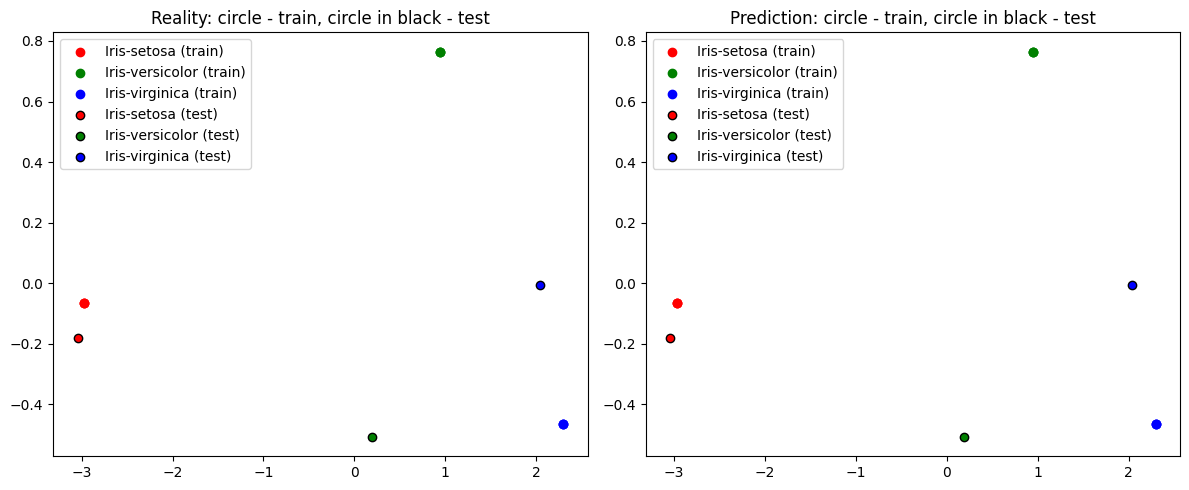

In [41]:
import matplotlib.pyplot as plt
from plotly import subplots
from sklearn.decomposition import PCA

all = x_train_data + [x + [1] for x in vect_iris_test]
all_labels = y_train_data + name_iris_test
all_pred = list(ker.predict(x_train_data)) + list(pred)

pcashka = PCA(n_components=3)
my_pca = pcashka.fit_transform(all)

train_size = len(x_train_data)
train_pca = my_pca[:train_size]
test_pca = my_pca[train_size:]


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
# Training
for species in colors:
    mask = [label == species for label in y_train_data]
    if any(mask):
        plt.scatter(train_pca[mask, 0], train_pca[mask, 1], c=colors[species], label=species + ' (train)')

# Test
for species in colors:
    mask = [label == species for label in name_iris_test]
    if any(mask):
        plt.scatter(test_pca[mask, 0], test_pca[mask, 1], c=colors[species], label=species + ' (test)', edgecolors='black')

plt.title('Reality: circle - train, circle in black - test')
plt.legend()


plt.subplot(1, 2, 2)
# Training
for species in colors:
    mask = [pred == species for pred in all_pred[:train_size]]
    if any(mask):
        plt.scatter(train_pca[mask, 0], train_pca[mask, 1], c=colors[species], label=species + ' (train)')

# Test
for species in colors:
    mask = [pred == species for pred in all_pred[train_size:]]
    if any(mask):
        plt.scatter(test_pca[mask, 0], test_pca[mask, 1], c=colors[species], label=species + ' (test)', edgecolors='black')

plt.title('Prediction: circle - train, circle in black - test')
plt.legend()

plt.tight_layout()
plt.show()